# Projeto I - Modelagem Matemática em Finanças I - 2019
> Grupo: Gil Miranda e João Victor Fonseca<br>
> Repo: [@mirandagil](https://github.com/mirandagil/university-courses/analise-numerica-edo-2019-1)<br>
---

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [3]:
def binomial(S0, T, dt, u, d, p):
    Si = S0
    S = []
    t = np.arange(0,T,dt)
    for ti in t:
        rnd = np.random.rand()
        if rnd < p:
            Si *= u
        else:
            Si *= p
        S.append(Si)
    return S

### 1) Plottando 20 caminhos de valor da ação

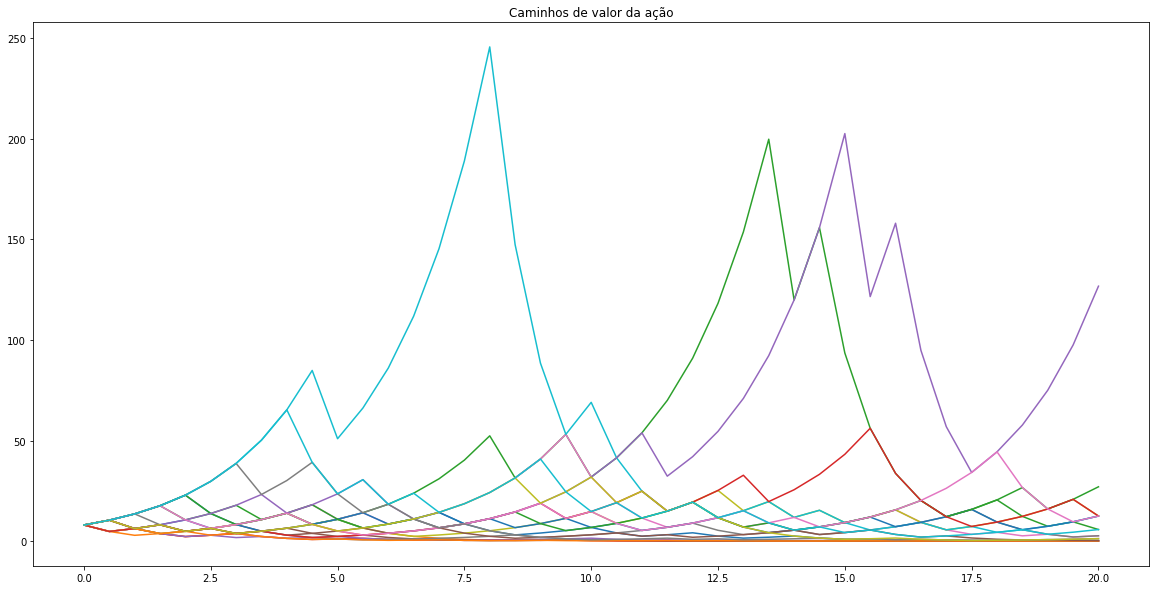

In [50]:
T = 20
dt = 0.5
S0 = 8
u = 1.3
d = 0.6
p = 0.6

x = [binomial(S0, T, dt, u, d, p) for i in range(0,20)]
for j in range(len(x)):
    x[j].insert(0,S0)
ts = np.linspace(0,20,41)
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.plot(ts,x[i])
plt.title('Caminhos de valor da ação')
plt.show()

Há um problema aqui, a maior parte dos caminhos de valor da ação estão convergindo para 0.
Portanto vamos analisar os gráficos na escala log em Y.
Identificarei cada curva com seu valor final

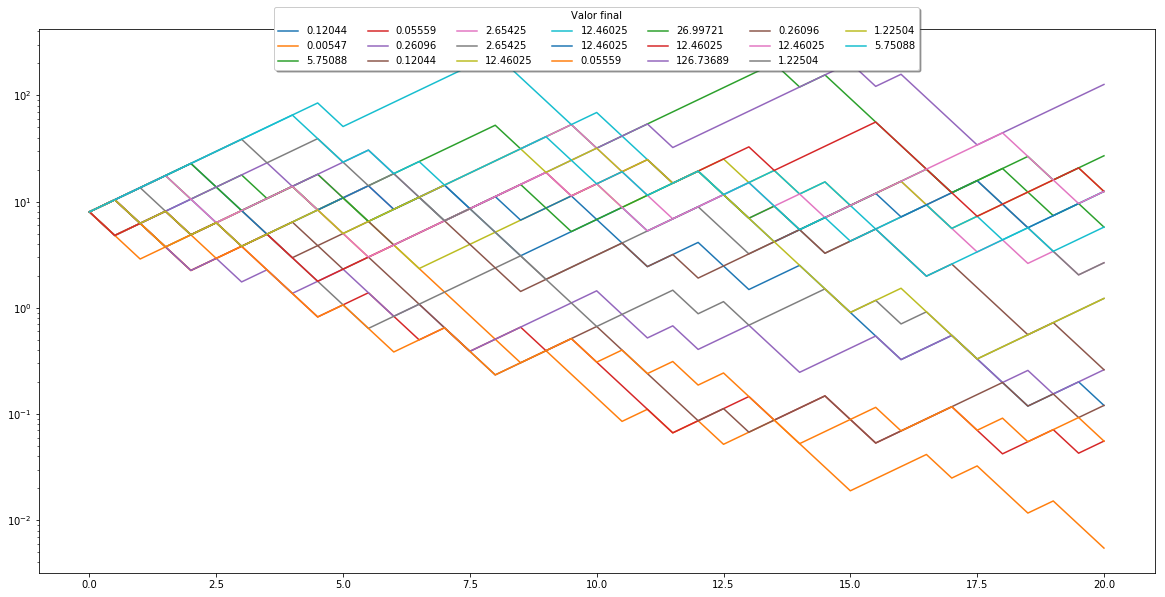

In [51]:
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.semilogy(ts,x[i],label="{0:.5f}".format(x[i][-1]))
plt.legend(title='Valor final', loc='upper center', fancybox=True, shadow=True, ncol=7, bbox_to_anchor=(0.5,1.05))
plt.title('Caminhos de valor da ação')
plt.show()

In [64]:
def media():
    m = 0
    for i in range(0,20):
        m += x[i][-1]
    return m/20
media()

11.808757263531497

## Boxplot

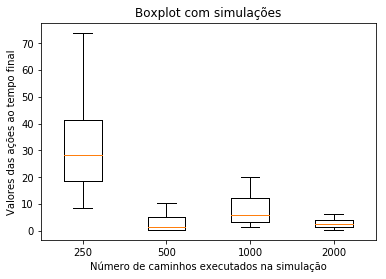

In [65]:
vs = []
for j in [250,500,1000,2000]:
    vs.append([binomial(S0, T, dt, u, d, p) for i in range(0,j)])
vf = [i[-1] for i in vs]

for v in vf:
    plt.boxplot(vf,showfliers=False)
plt.title('Boxplot com simulações')
plt.ylabel('Valores das ações ao tempo final')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

## Modificando os parâmetros

Boxplot com<br>
$u_1 = \sqrt{u}$<br>
$d_1 = \sqrt{d}$<br>
$t_1 = \dfrac{t}{2}$

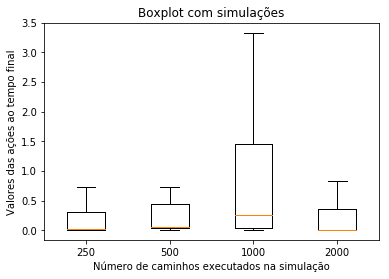

In [141]:
vs = []
med = []
for j in [250,500,1000,2000]:
    vs.append([binomial(S0, T, dt/2, np.sqrt(u), np.sqrt(d), p) for i in range(0,j)])
vf = [i[-1] for i in vs]

for v in vf:
    med.append(plt.boxplot(vf,showfliers=False))
plt.title('Boxplot com simulações')
plt.ylabel('Valores das ações ao tempo final')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

In [142]:
E = (0.6 * np.sqrt(1.3) + 0.4 * np.sqrt(0.6))*8

In [143]:
med[0]['medians'][3].get_ydata()

array([0.00867625, 0.00867625])

In [144]:
def e2(n):
    r = 0
    for i in range(n):
        r+=  p**i * (1-p)**(n-i) * np.sqrt(u)**i * np.sqrt(d)**(n-i)*S0
    return r

In [145]:
e2(20)

0.0033381282623475674